Name - Harini Ramasubbu
MIS 545 and Section 02

In [1]:
import os
directory_path = 'C:\\Users\\ual-laptop\\OneDrive - University of Arizona\\Documents\\DA Projects\\archive'
# Check if the directory exists; if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# Now, you should be able to save your file into this directory

In [2]:
# 2. Read the data from the CSV file
import pandas as pd
read_file = pd.read_csv (r'C:\\Users\\ual-laptop\\OneDrive - University of Arizona\\Documents\\DA Projects\\archive\\ECommerce.csv')

read_file.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
#4. Remove all spaces from the column headings.
read_file.columns = read_file.columns.str.replace(' ', '')
read_file.head(5)

,CustomerID,Gender,Age,City,MembershipType,TotalSpend,ItemsPurchased,AverageRating,DiscountApplied,DaysSinceLastPurchase,SatisfactionLevel
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
#11. Read ECommerce.csv into a data frame called eCommerce1.
eCommerce1 = pd.read_csv (r'C:\\Users\\ual-laptop\\OneDrive - University of Arizona\\Documents\\DA Projects\\archive\\ECommerce.csv')

In [7]:
#Now let’s have a look at whether the dataset has any null values or not:
eCommerce1.isnull().sum()
# Now let’s have a look at whether the dataset has any null values or not:
print(eCommerce1.isnull().sum())


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [8]:
#Remove the missing values from the data frame.
eCommerce1.dropna(inplace=True)
#Now let’s have a look at whether the dataset has any null values or not:
print(eCommerce1.isnull().sum())

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [9]:
#datatypes of the columns
eCommerce1.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

In [10]:
# Display the descriptive statistics of the dataset
eCommerce1.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [15]:
#4. Remove all spaces from the column headings.
read_file.columns = read_file.columns.str.replace(' ', '')
read_file.head(5)

,CustomerID,Gender,Age,City,MembershipType,TotalSpend,ItemsPurchased,AverageRating,DiscountApplied,DaysSinceLastPurchase,SatisfactionLevel
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


Analysis Begin:

First Analysis: Total Spending Over Time

In [12]:
#Now, let’s have a look at the trend of the Total Spending over time:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

In [69]:
import plotly.graph_objects as go

# Assuming eCommerce1 has a column 'DaysSinceLastPurchase' indicating the days since the last purchase
# You need to replace 'DaysSinceLastPurchase' with the actual column name in your dataset
fig = go.Figure()

# Iterate through each cohort based on 'DaysSinceLastPurchase'
for cohort_days, cohort_data in eCommerce1.groupby('Days Since Last Purchase'):
    # Sort cohort data by 'DaysSinceLastPurchase' to create a smooth line
    cohort_data = cohort_data.sort_values(by='Days Since Last Purchase')
    
    fig.add_trace(go.Scatter(
        x=cohort_data['Days Since Last Purchase'],
        y=cohort_data['Total Spend'],
        mode='lines+markers',
        name=f'Cohort {cohort_days}'  # You can customize the cohort names
    ))

fig.update_layout(
    title='Total Spend Over Time by Cohort',
    xaxis_title='Days Since Last Purchase',
    yaxis_title='Total Spend',
    showlegend=True
)

plot(fig)


'temp-plot.html'

In [53]:
#From the graph there arises 3 questions:
#1. Calculate average total spending per customer
eCommerce1['Total Spend'].mean()

847.7931034482758

In [54]:
#2. Calculate the number of customers in each cohort
cohort_data = eCommerce1.groupby('Days Since Last Purchase')['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_data.columns = ['Days Since Last Purchase', 'TotalCustomers']
cohort_data

,Days Since Last Purchase,TotalCustomers
0,9,9
1,10,17
2,11,6
3,12,17
4,13,20
5,14,13
6,15,11
7,16,5
8,17,10
9,18,12


In [55]:
#3. calculate the percentage of customers who stopped purchasing within a given time frame without splitting the data into cohorts
# Calculate the number of customers who stopped purchasing within a given time frame
# Assuming 'Days Since Last Purchase' is the number of days since the last purchase
time_frame = 30
churn_data = eCommerce1[eCommerce1['Days Since Last Purchase'] > time_frame]['Customer ID'].nunique()
print(churn_data)

124


Analysis 2: Average rating given by customers based on the membership type:

In [76]:
import pandas as pd
import plotly.express as px

# Assuming your dataset is named 'eCommerce1' and contains columns like 'Customer ID', 'AverageRating', etc.
# You need to replace column names accordingly

# Define Rating Cohorts (e.g., based on 'MembershipType')
cohorts = eCommerce1.groupby('Membership Type')

# Calculate Average Rating for each cohort
average_rating_by_cohort = cohorts['Average Rating'].mean().reset_index()

# Visualize the data using a bar chart
fig = px.bar(
    average_rating_by_cohort,
    x='Membership Type',
    y='Average Rating',
    title='Average Rating by Membership Type',
    labels={'Average Rating': 'Average Rating'},
    color='Membership Type'
)
plot(fig)

'temp-plot.html'

Analysis 3: Items purchased over time by different type of cohort split based on the Days Since Last Purchase.

In [74]:
import plotly.graph_objects as go

# Assuming your dataset is named 'eCommerce1' and contains columns like 'ItemsPurchased', 'DaysSinceLastPurchase', etc.
# You need to replace column names accordingly

fig = go.Figure()

# Iterate through each cohort based on 'DaysSinceLastPurchase'
for cohort_days, cohort_data in eCommerce1.groupby('Days Since Last Purchase'):
    # Calculate the mean of 'Items Purchased' for each cohort
    cohort_mean = cohort_data.groupby('Days Since Last Purchase')['Items Purchased'].mean()
    
    fig.add_trace(go.Bar(
        x=[cohort_days],  # Use a list with a single value for bar placement
        y=[cohort_mean.values[0]],  # Use the mean value for the y-axis
        name=f'Cohort {cohort_days}'
    ))

fig.update_layout(
    title='Average Items Purchased Over Time by Cohort',
    xaxis_title='Days Since Last Purchase',
    yaxis_title='Average Items Purchased',
    showlegend=True
)

plot(fig)


'temp-plot.html'

Analyis 4: City and Age Based Analysis 

In [92]:
import plotly.graph_objects as go

fig = go.Figure()

# Define age ranges (you can customize this based on your data)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column for age range
eCommerce1['Age Range'] = pd.cut(eCommerce1['Age'], bins=age_bins)

# Group customers by age range and city
cohort_groups = eCommerce1.groupby(['Age Range', 'City'])

# Iterate through each cohort
for (age_range, city), cohort_data in cohort_groups:
    fig.add_trace(go.Bar(
        x=cohort_data['Total Spend'],
        y=[f'Age Range: {age_range}, City: {city}'],
        name=f'Age Range: {age_range}, City: {city}',
        orientation='h'  # Set orientation to horizontal
    ))

fig.update_layout(
    title='Total Spend by Age Range and City',
    xaxis_title='Total Spend',
    yaxis_title='Age and City',
    barmode='stack',
    showlegend=True
)

plot(fig)


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_18952\1192616765.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



'temp-plot.html'

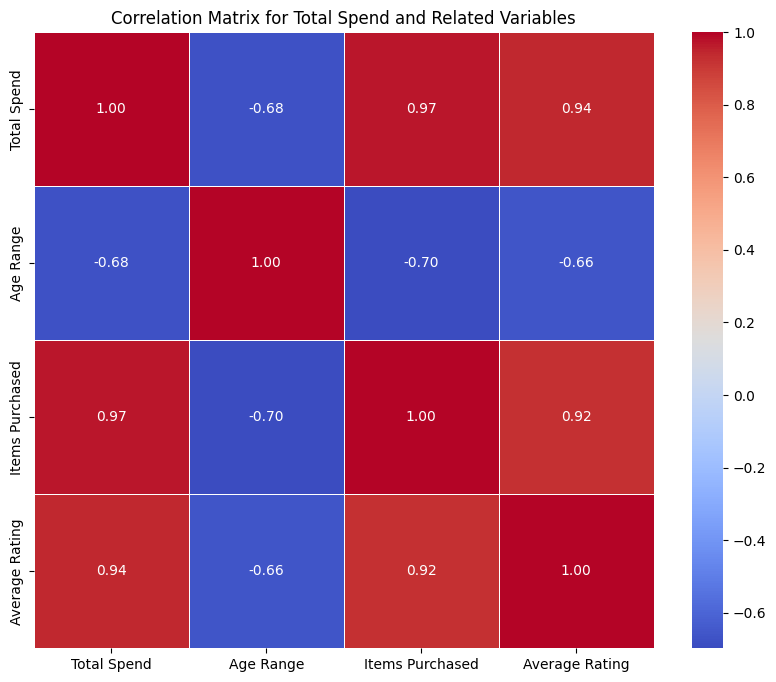

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Age Range' is a categorical column, you might need to convert it to numeric for correlation
# If 'Age Range' is already numeric, you can skip this step
eCommerce1['Age Range'] = eCommerce1['Age Range'].astype('category').cat.codes

# Select columns for correlation matrix
correlation_columns = ['Total Spend', 'Age Range', 'Items Purchased', 'Average Rating']

# Create a DataFrame with selected columns
selected_columns = eCommerce1[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Total Spend and Related Variables')
plt.show()
